<a href="https://colab.research.google.com/github/daffinyyy/RNA_PP2.1/blob/main/RNA_PP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNA - PP2.1 - Aprendizado Supervisionado no Neurônio Perceptron
Aluna: Aline Daffiny Ferreira Gomes - Matrícula: 2315310026  
Orientadora: Profa. Dra. Elloa B Guedes

##Detalhamento da Atividade
A atividade será dividida em três partes, cada uma a ser apresentada a seguir. Todas as atividades tem como entrada um arquivo txt com conteúdo em binário descrevendo um **numpy.ndarray** salvo previamente contendo múltiplos exemplos de dimensões (1,3), ou seja, tem dimensões (m, 1, 3), em que m varia a depender do documento considerado, de 800 a 1000, em média. Cada exemplo representa um ponto no R<sup>2</sup> e o seu respectivo rótulo, isto é, tem-se (x<sub>1</sub>, x<sub>2</sub>, y<sub>d</sub>). Os valores de y<sub>d</sub> correspondem às classes discretas e binárias 0 e 1, em que a classe 0 deve ser denotada na cor vermelha e a classe 1 deve ser denotada na cor azul.

###Parte I – Resolvendo um Problema Linearmente Separável  
Nesta parte, todas as equipes devem usar o arquivo **dataAll.txt** e construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos
devem ser considerados:
1. As equipes devem utilizar a função de ativação degrau com ϑ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de
distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve
ser impresso no início da execução do algoritmo;
4. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os
exemplos presentes no conjunto de treinamento;
5. Ao final, deve-se imprimir:
- O número total de ajustes no vetor de pesos;
- O número de épocas até a convergência;
- O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

**Importação de bibliotecas**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

**Funções relacionadas aos vetores**

In [10]:
def format_data(data, n_var):
  '''
  data: arquivo
  n_var: numero de variaveis por linha (incluindo o target)
  '''
  n_rows = data.size / n_var
  matriz_data = data.reshape(int(n_rows), n_var)
  #print(matriz_data)

  return matriz_data

def xy_split(data):
  '''
  data: arquivo já formatado
  '''
  X = data[:, :-1] #[linha, coluna]
  y = data[:, -1]
  #print(X)
  #print(y)

  return X, y

**O Perceptron**

In [11]:
class Perceptron:
  def __init__(self, X, y, t_aprend, theta):
    '''
    X: features (treinamento)
    y: target (treinamento)
    t_aprend: taxa de aprendizado
    theta: limiar
    '''
    self.X = X
    self.y = y
    self.t_aprend = t_aprend
    self.theta = theta
    self.w = None #vai ser definido depois
    self.bias = None #definido dps


  def f_ativ(self, x):
    if x >= self.theta:
      return 1
    else:
      return 0


  def init_weights(self, low, high):
    '''
    low: limite inferior
    high: limite superior
    '''
    size = self.X.shape[1]
    self.w = np.random.uniform(low, high, size)
    print(f"pesos iniciais: {self.w}")


  def include_bias(self, v):
    '''
    v: valor do bias
    '''
    self.bias = v

    x0 = np.ones((self.X.shape[0], 1)) * v
    self.X = np.hstack((x0, self.X))
    #print(self.X.shape)
    print(f"Bias com valor {v} adicionado ao conjunto X")


  def train(self, max_epochs=None, randomize=False):
    '''
    max_epochs: opcional, se não fornecido, até a convergência
    randomize: opcional, aleatorizar os dados

    retorna o numero de epocas, total de ajustes e os pesos finais
    '''
    n_epocas = 0
    n_ajustes = 0
    converged = False

    while not converged:
      ajustes = 0

      if randomize: #usar no terceiro problema
        index = np.arange(self.X.shape[0])
        np.random.shuffle(index) #embaralha
        self.X = self.X[index]
        self.y = self.y[index]

      for i in range(self.X.shape[0]):
        x = np.dot(self.X[i], self.w) #aplica os pesos
        pred = self.f_ativ(x) #passa pela função de ativação
        erro = self.y[i] - pred #calcula o erro pra ajustar

        #ajustando
        if erro != 0:
          self.w += self.t_aprend * erro * self.X[i] #delta
          ajustes += 1
          n_ajustes += 1

      n_epocas += 1
      #print(f"Época {n_epocas} - ajustes: {ajustes}")
      #checando se para o treino
      if ajustes == 0:
        converged = True
      if (max_epochs is not None) and (n_epocas >= max_epochs):
        converged = True

    return n_epocas, n_ajustes, self.w


  def test(self, X, w, y):
    '''
    X: features (teste)
    w: pesos finais
    y: target (teste)

    retorna o numero de acertos e o vetor com as predições
    '''
    x0 = np.ones((X.shape[0], 1)) * self.bias
    X_bias = np.hstack((x0, X))

    acertos = 0
    predicoes = []

    for i in range(X_bias.shape[0]):
      x = np.dot(X_bias[i], w) #aplica os pesos
      pred = self.f_ativ(x)  #passa pela função
      predicoes.append(pred) #guarda para matriz confusão
      if pred == y[i]:
        acertos += 1

    return acertos, predicoes

depois de iniciar o perceptron:
1. se quiser bias, chame .include_bias()
2. inicie os pesos com .init_weights()
3. fazer o treinamento
4. fazer o teste (passar X_test e y_test como parametro)


In [12]:
dataAll = np.fromfile("/content/dataAll.txt")
#dataAll

format_dataAll = format_data(dataAll, 3)
X, y = xy_split(format_dataAll)

In [13]:
perceptron = Perceptron(X, y, 0.1, 0)

perceptron.include_bias(1)
perceptron.init_weights(-0.5, 0.5)

total_epocas, total_ajustes, pesos_finais = perceptron.train() #sem max de épocas, sem aleatoriedade
print(f"total de épocas: {total_epocas}")
print(f"total de ajustes: {total_ajustes}")


Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [ 0.46903115 -0.42823196  0.30448757]
total de épocas: 4
total de ajustes: 55


**Plotar gráfico**

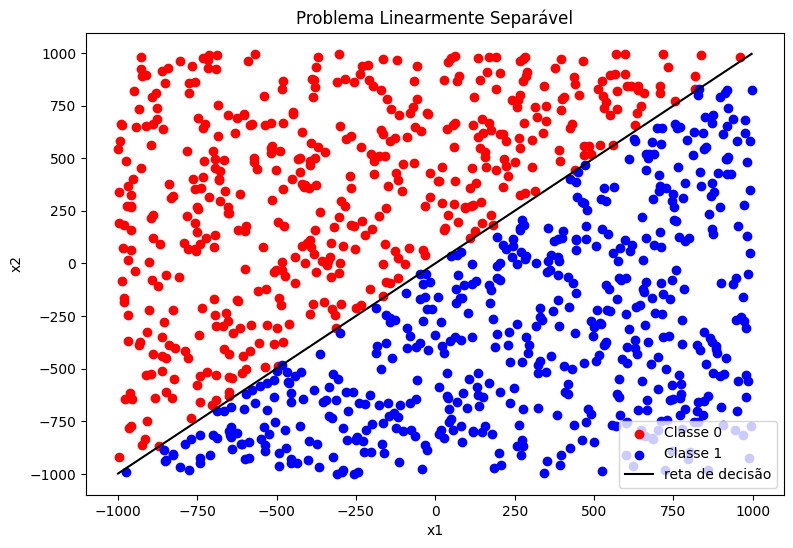

In [14]:
#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

x_val = [min(X[:, 1]), max(X[:, 1])]
y_val = - (pesos_finais[1] * np.array(x_val) + pesos_finais[0]) / pesos_finais[2]
plt.plot(x_val, y_val, label='reta de decisão', color='black')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema Linearmente Separável')
plt.legend()
plt.show()

###Parte II - Experimentação
Nesta segunda parte, cada equipe deverá usar o seu respectivo identificador de exemplos para trabalhar com um arquivo específico. Por exemplo, se a equipe tem identificador 3, deve considerar o arquivo data3.txt.  
A equipe deve aproveitar o algoritmo construído na Parte I e executar 10 repetições do mesmo para as seguintes configurações: η×I = {0.4, 0.1, 0.01}× {(−100,+ 100),(−0.5,+ 0.5)} em que I é o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos. Assim, há 6 configurações a serem testadas, cada uma delas por 10 repetições.  
Para cada configuração em suas 10 execuções, **obter a média e o desvio padrão da quantidade de ajustes** efetuados no vetor de pesos **e o menor número de épocas até a convergência** nestas 10 repetições. Dispor tais resultados sobre a forma de uma tabela e discutir se há uma configuração melhor ou pior que as demais ou se elas são equivalentes. Uma estrutura para esta tabela é sugerida a seguir, a qual foi preenchida com dados fictícios. Recomenda-se a utilização do pacote **prettytable** no notebook.  
| Taxa de aprendizado | Intervalo de pesos | Qtd de ajustes | Menor n° de épocas para convergência |  
| :-----: | :---------: | :----------: | :---: |  
| η = 0.4 | (-0.5, 0.5) | 25.32 ± 3.41 |  42   |
| η = 0.1 | (-0.5, 0.5) | 45.41 ± 7.82 |  56   |  
|   ...   |     ...     |     ...      |  ...  |

**Matrícula** = 23153100**26**  
**Identificador** = (2 + 6) mod 4 = 8 mod 4 = 0



**Arrumando o dataset**

In [15]:
dataZero = np.fromfile("/content/data0.txt")
#dataZero

format_dataZero = format_data(dataZero, 3)
X, y = xy_split(format_dataZero)

**Realizando a experimentação**

In [16]:
#variaveis da experimentação
config_t_aprend = [0.4, 0.1, 0.01]
config_intv_pesos = [[-100, 100], [-0.5, 0.5]]
num_repeticoes = 10
resultados_exp = []

#iniciando perceptron
for t_aprend in config_t_aprend:
  for intv_pesos in config_intv_pesos:
    print(f"η={t_aprend} x I={intv_pesos}")
    vet_ajustes = []

    #repetindo a experimentação 10 vezes
    for i in range(num_repeticoes):
      print(f"repetição {i}")
      menor_n_epocas = np.inf
      perceptron = Perceptron(X, y, t_aprend, 0)

      perceptron.include_bias(1)
      perceptron.init_weights(intv_pesos[0], intv_pesos[1])

      total_epocas, total_ajustes, pesos_finais = perceptron.train()

      vet_ajustes.append(total_ajustes)  #guardando para a media e dp
      if total_epocas < menor_n_epocas: #guardando o menor n de epocas
        menor_n_epocas = total_epocas

    media_ajustes = np.mean(vet_ajustes)
    dp_ajustes = np.std(vet_ajustes)
    print(f"MÉDIA DE AJUSTES: {media_ajustes}")
    print(f"DESVIO PADRÃO DOS AJUSTES: {dp_ajustes}")
    print(f"MENOR NÚMERO DE ÉPOCAS: {menor_n_epocas}")
    print()
    #guardando pra prettytable
    resultados_exp.append([t_aprend, intv_pesos, media_ajustes, dp_ajustes, menor_n_epocas])

η=0.4 x I=[-100, 100]
repetição 0
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [-31.91122791 -50.38380381  22.94619923]
repetição 1
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [38.07875251 89.72180157 36.68139214]
repetição 2
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [67.41957263 86.45337423 57.5875205 ]
repetição 3
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [ 43.35742789  97.95098212 -20.70486708]
repetição 4
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [ 77.08348979 -95.15866963 -36.9561747 ]
repetição 5
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [-56.08706658 -82.91841721  78.85775951]
repetição 6
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [-57.62188599 -35.63364597  17.44936567]
repetição 7
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [-63.56292466  80.72714907  -4.74197688]
repetição 8
Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [-20.8051308   63.85065007

**Exibindo resultados em uma tabela**

In [17]:
# resultados_exp

#formatando resultado
format_resultados = []
for taxa, intv, media, dp, n_epocas in resultados_exp:
  format_resultados.append([
      f"η={taxa}",
      intv,
      f"{media} ± {dp:.2f}",
      n_epocas
  ])

#montando a tabela
table_resultados = PrettyTable()
table_resultados.field_names = ["Taxa de aprendizado", "Intervalo de pesos",
                                "Qtd de ajustes",
                                "Menor n° de épocas para convergência"]
table_resultados.add_rows(format_resultados)
print(table_resultados)


+---------------------+--------------------+-------------------+--------------------------------------+
| Taxa de aprendizado | Intervalo de pesos |   Qtd de ajustes  | Menor n° de épocas para convergência |
+---------------------+--------------------+-------------------+--------------------------------------+
|        η=0.4        |    [-100, 100]     |   284.4 ± 170.66  |                  23                  |
|        η=0.4        |    [-0.5, 0.5]     |     7.0 ± 2.57    |                  5                   |
|        η=0.1        |    [-100, 100]     |  1295.2 ± 541.61  |                  17                  |
|        η=0.1        |    [-0.5, 0.5]     |     8.0 ± 4.49    |                  3                   |
|        η=0.01       |    [-100, 100]     | 10910.7 ± 8691.26 |                 224                  |
|        η=0.01       |    [-0.5, 0.5]     |    53.8 ± 28.65   |                  7                   |
+---------------------+--------------------+-------------------+

**Discussão**  
Rankeando os melhores resultados, temos:  
1. η=0.4 × I=[-0.5, 05]
2. η=0.1 × I=[-0.5, 05]
3. η=0.01 × I=[-0.5, 05]
4. η=0.4 × I=[-100, 100]
5. η=0.1 × I=[-100, 100]
6. η=0.01 × I=[-100, 100]

Fica evidente a influência dos valores no treinamento. Primeiramente, os melhores resultados foram aqueles com o intervalo de pesos entre [-0.5, 0.5], da maior taxa de aprendizado para a menor, seguidos pelo intervalo [-100, 100] e a mesma ordem das taxas de aprendizado. Intervalos de pesos maiores geram saídas maiores e mais longes do limiar escolhido, por isso o intervalo [-0.5, 0.5] se destaca, com menos épocas e ajustes necessários.  
Entretanto, no experimento (η=0.01 × I=[-0.5, 05]), apesar do baixo número de épocas, é possível observar um significativo aumento de ajustes comparado a outros experimentos no mesmo intervalo. Isso se dá devido à influência da taxa de aprendizado, que atua como uma "sensibilidade" no deslocamento dos pesos para o melhor resultado. Como a taxa é baixa, a correção é feita vagarosamente, o que, combinado com um intervalo muito amplo, como no último experimento, se mostra desastroso, com o melhor resultado levando 523 épocas até a convergência, e a média de ajustes de aproximadamente 12.918, com desvio padrão altíssimo também.  
Em resumo, o importante é manter os intervalos pequenos e próximos do valor de ativação do neurônio, e com taxas de aprendizado não muito pequenas, para não retardar o deslocamento do vetor de pesos.

###Parte III – Validação Holdout em Problema Não-Linearmente Separável
Todas as equipes devem considerar o arquivo **dataHoldout.txt** e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.
Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste). A semente de aleatoriedade deve ser igual ao identificador da equipe. Embora o problema não seja linearmente separável, vamos utilizar os dados de treinamento para obter uma reta de separação das classes com o neurônio Perceptron (solução possível). O neurônio em questão tem função de ativação degrau com ϑ = 0, os
valores de η e de inicialização de pesos devem seguir as recomendações da literatura e os pesos do neurônio devem ser aleatoriamente escolhidos a partir de U(−0,5, + 0,5). Execute o algoritmo por 100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em ordem aleatória.  
Efetue a previsão da saída deste neurônio para todos os exemplos do conjunto de teste, comparandoa com a saída desejada e responda ao que se pede:
1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;
2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score. Para estes cálculos, está liberada a utilização de sklearn.metrics;
4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.  

Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

**Arrumando o dataset**

In [18]:
dataHoldout = np.fromfile("/content/dataHoldout.txt")
#dataHoldout

format_dataHoldout = format_data(dataHoldout, 3)
X, y = xy_split(format_dataHoldout)

**Mostrando que não é linearmente separável**

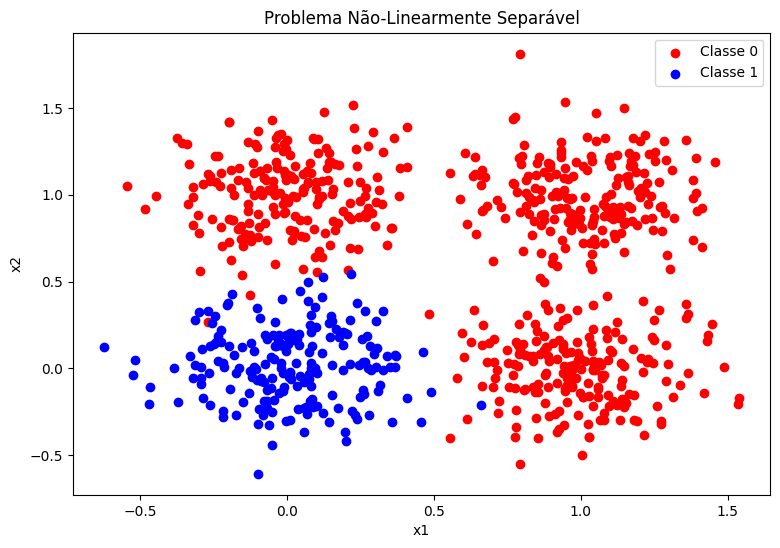

In [19]:
#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema Não-Linearmente Separável')
plt.legend()
plt.show()

**Holdout**

In [20]:
def holdout_split(X, y, train_size=0.7, randomize=True):
  '''
  X: features (treinamento)
  y: target (treinamento)
  train_size: tamanho da partição do treino, padrão=0.7
  randomize: opcional, aleatorizar os dados, padrão=True
  '''
  split = int(train_size * len(X))

  index = np.arange(X.shape[0])
  if randomize:
    np.random.shuffle(index)

  index_train = index[:split] #todos os valores até o split
  index_test = index[split:] #do split até o final

  X_train, y_train = X[index_train], y[index_train]
  X_test, y_test = X[index_test], y[index_test]
  return X_train, y_train, X_test, y_test

In [21]:
X_train, y_train, X_test, y_test = holdout_split(X, y)

**Treinamento do Perceptron**

In [22]:
perceptron = Perceptron(X, y, 0.1, 0)

perceptron.include_bias(1)
perceptron.init_weights(-0.5, 0.5)

total_epocas, total_ajustes, pesos_finais = perceptron.train(100, True) #com max de epocas e randomize
print(f"total de épocas: {total_epocas}")
print(f"total de ajustes: {total_ajustes}")

Bias com valor 1 adicionado ao conjunto X
pesos iniciais: [ 0.17744225 -0.32985332  0.15044063]
total de épocas: 100
total de ajustes: 4371


**Teste do Perceptron**

In [23]:
n_acertos_test, predicoes_test = perceptron.test(X_test, pesos_finais, y_test)

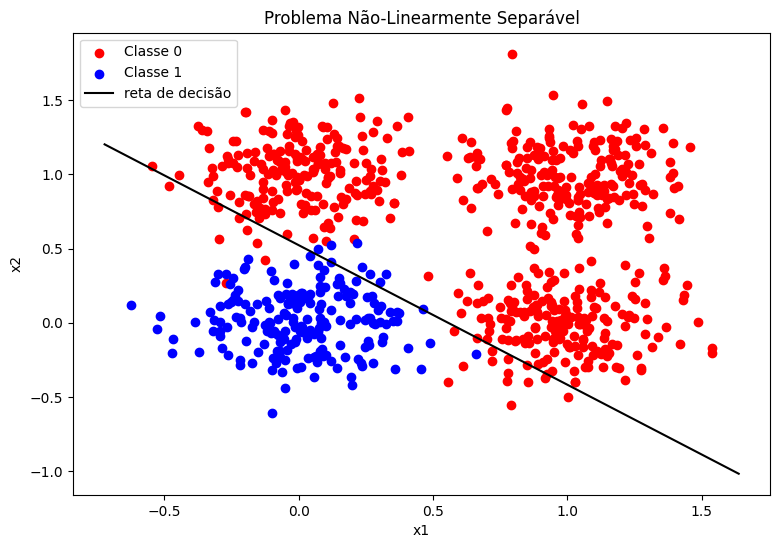

In [24]:
#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

padding = 0.1
x_val = [X[:, 0].min() - padding, X[:, 0].max() + padding]
y_val = - (pesos_finais[1] * np.array(x_val) + pesos_finais[0]) / pesos_finais[2]
plt.plot(x_val, y_val, label='reta de decisão', color='black')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema Não-Linearmente Separável')
plt.legend()
plt.show()

####**Responda ao que se pede**

1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;


posso usar o sklearn aqui?

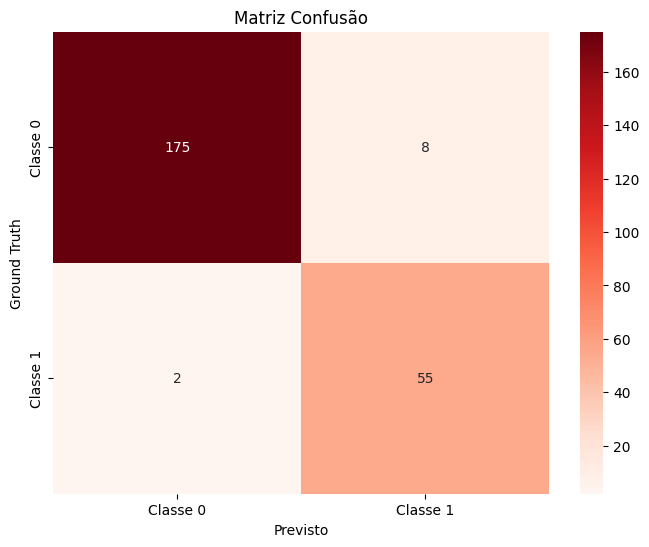

In [26]:
matriz_confusao = confusion_matrix(y_test, predicoes_test)

#plotando o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Reds', fmt='d', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Ground Truth')
plt.title('Matriz Confusão')
plt.show()

2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente
fornecido?


In [27]:
n_acertos_train, predicoes_train = perceptron.test(X_train, pesos_finais, y_train)

acuracia_train = n_acertos_train / len(y_train)
print(f"Acurácia do conjunto de treino: {acuracia_train}")

Acurácia do conjunto de treino: 0.9625


3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;


In [28]:
precisao = precision_score(y_test, predicoes_test)
revocacao = recall_score(y_test, predicoes_test)
f1 = f1_score(y_test, predicoes_test)

print(f"Precisão: {precisao}")
print(f"Revocação: {revocacao}")
print(f"F1 Score: {f1}")

Precisão: 0.873015873015873
Revocação: 0.9649122807017544
F1 Score: 0.9166666666666666


4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de
testes.

Levando em consideração a natureza do problema (não-linearmente separável) e que seria impossível encontrar uma solução perfeita, o modelo conseguiu achar uma resposta bem satisfatória. Considerando a classe 1 como classe positiva, e a classe 0 como classe negativa:
- **Precisão = 84,5%**  
Razoável minimizando falsos positivos.
- **Recall = 96,77%**  
Ótimo minimizando falsos negativos. Excepcionalmente impressionante dado o desbalanceamento de dados, e como a classe 1 estava em desvantagem.
- **F1 score = 0.9022**  
modelo bem equilibrado.  

A **acurácia** do modelo também foi bem alta nos dados de treino, sendo **96,07%**. Analisando todas as métricas, é possível inferir que o desempenho do modelo foi muito bom levando em consideração as condições do problema, do dataset e do treino.